# Видео 2

$\vec{O} = \left\{\begin{matrix}x = 3\cos(2t)\cos(t)+0.82\\y = 3\cos(2t)\sin(t)+0.82
\end{matrix}\right.
$
1. Построить симуляцию, где будут отображены: $y(x)$, $\vec{v}$, $\vec{a}$, $\vec{a}_n$, $\vec{a}_\tau$.
2. Построить графики $v(t)$, $a(t)$.
3. Написать алгоритм решения.

# Видео 3

Механизм состоит из ступенчатых колёс $1$, $2$, $3$, которые соприкасаются и соединены ременной передачей, стойки $4$ и груза $5$, привязанного к концу нити, которая намотана на одно из колёс.
    
Радиусы шагов колёс: у колеса $1$ — $r_1 = 2$, $R_1 = 4$; у колеса $2$ — $r_2 = 6$, $R_2 = 8$; у колеса $3$ — $r_3 = 12$, $R_3 = 16$. Точки $A$, $B$ и $C$ расположены на ободьях колёс.

Задан закон движения груза: $s_5 = t^3 - 6t$. Положительное направление для $s_5$ — вниз.

Задача:
1. Найти ($t=2$): скорости $A,\ C$; угловое ускорение $3$; ускорения $B$ и $4$.
2. Построить графики $V_a(t),\ V_c(t), \varepsilon_3(t),\ a_B(t),\ a_4(t)$, $t\in[0..10]$.
3. Написать алгоритм решения.

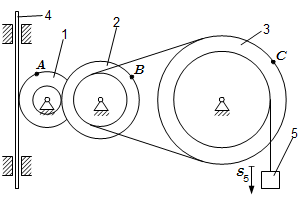

# Видео 4

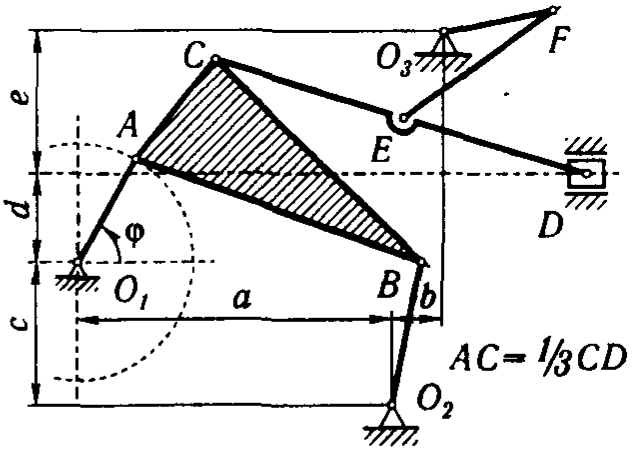


Схема: А. Яблонский / Сборник заданий для курсовых работ по теоретической механике. Высшая школа, 1978

Вы должны:
- смоделировать этот механизм (получить все положения);
- найти скорости для $A,\ B,\ C,\ E,\ F,\ D$;
- найти ускорения для $A$ и $B$;
- описать алгоритм решения задачи.
    
$\omega_{O_1A}=2$ рад/с; \\
$\phi=60^\circ;\ a=56;\ b=10;\ c=26;\ d=16;\ e=25$; \\
$O_1A=21;\ O_2B=25;\ O_3F=20;\ AB=54;\ BC=52;\\
CD=69;\ CE=35;\ EF=32.$

# Видео 5

Вы должны: \\
1. Смоделировать этот механизм (получить все положения).
2. Найти абсолютную, переносную и относительную скорости и ускорения для $M$.
3. Найти $t$, когда $M$ достигнет точки $A$.
4. Написать алгоритм решения.

$OM=s_r(t)=6\pi t^2$;

$\phi(t)=\frac{\pi t^3}{6}$;

$R=18,\ O_1O=O_2A=20$.

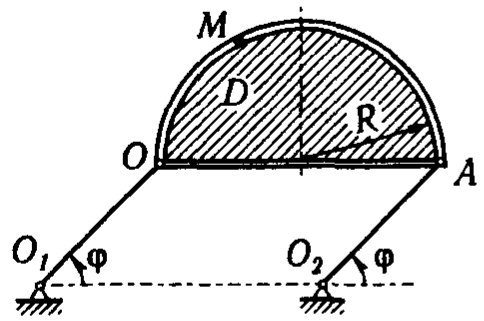

# Видео 6

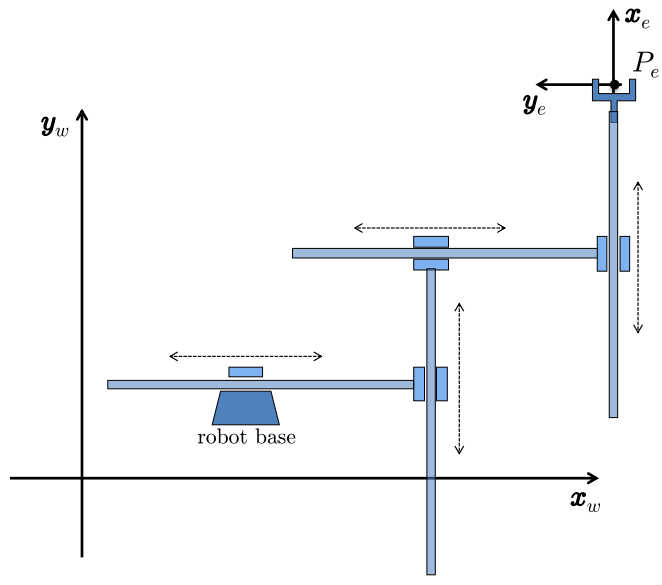


Изображение предоставлено А. Климчиком

Для данного манипулятора PPP:
1. Найти матрицу преобразований ($H$).
2. Решить прямую задачу кинематики (написать функцию, которая на вход принимает длины шарниров, а на выходе возвращает вектор $[x,y,\alpha]$.

*Подсказка.* Стоит обратить внимание на расположение последней системы координат.

3. Решить аналитически обратную задачу кинематики ($[x,y,\alpha] \rightarrow [l_1,\ l_2,\ l_3,\ l_4]$). Проверить её с помощью прямой кинематики (взять значения шарниров, подставить в FK, полученное значение FK подставить в IK; сравнить результат с изначальными значениями шарниров).
*Подсказка.* Подумайте, сколько уравнений необходимо для описания объекта на плоскости и сколько у вас неизвестных (количество шарниров). Что с этим можно сделать и какие у этого преимущества и недостатки?

# Видео 7

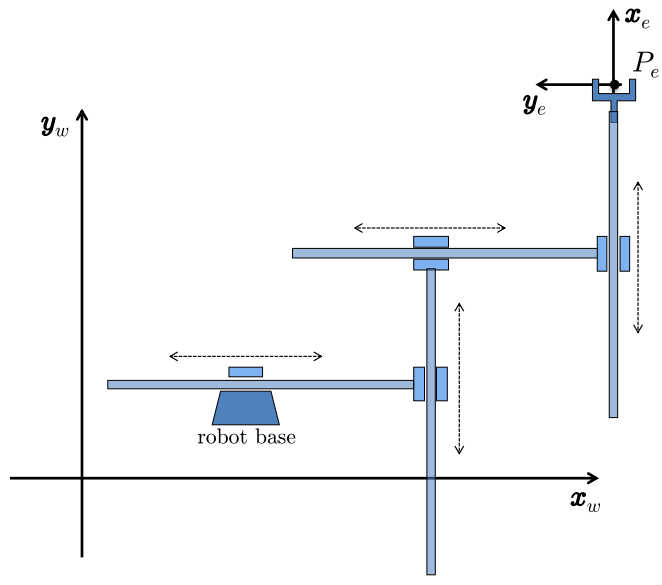

Изображение предоставлено А. Климчиком

Для манипулятора PPP:
1. Найти матрицу Якоби.
2. Сделать пример перехода из пространства шарниров в декартово пространство. Длины шарниров: $2,\ 3,\ 4,\ 8$.
3. Решить задачу обратной кинематики с помощью метода Ньютона. Для этого необходимо:
- посчитать прямую кинематику для некоторых значений длин шарниров;
- полученную прямую кинематику подставить в алгоритм;
- проверить полученные длины шарниров, подставив их в функцию прямой кинематики и сравнив с изначальным значением.

In [ ]:
import numpy as np

# Прямая кинематика
def forward_kinematics(q):
    return np.array([q[0], q[1], q[2], q[3]])

# Матрица Якоби
def jacobian(q):
    return np.eye(4)

# Обратная кинематика методом Ньютона
def inverse_kinematics(target, q_init, max_iter=100, tol=1e-6):
    q = np.array(q_init, dtype=float)
    for i in range(max_iter):
        x_current = forward_kinematics(q)
        error = target - x_current
        if np.linalg.norm(error) < tol:
            print(f"Решение найдено за {i+1} итераций")
            break
        J = jacobian(q)
        dq = np.linalg.solve(J, error)
        q += dq
    return q

# Матрица Якоби
q_example = [2, 3, 4, 8]
J = jacobian(q_example)
print("Матрица Якоби:")
print(J)

# Прямая кинематика
x_e = forward_kinematics(q_example)
print("\nПрямая кинематика для q =", q_example)
print("Положение энд-эффектора (x_e, y_e, z_e, w_e):", x_e)

# Обратная кинематика
target = np.array([5, 6, 7, 9])
q_init = [0, 0, 0, 0]
q_solution = inverse_kinematics(target, q_init)
print("\nОбратная кинематика для цели", target)
print("Решение q =", q_solution)

# Проверка постоянной прямой кинематики
q_constant = [2, 3, 4, 8]
x_constant = forward_kinematics(q_constant)
print("\nПостоянная прямая кинематика для q =", q_constant)
print("Положение:", x_constant)

# Проверка полуобратной кинематики
x_half_target = np.array([2, 3, 4, 8])
q_half = inverse_kinematics(x_half_target, [0, 0, 0, 0])
print("\nПолуобратная кинематика для цели", x_half_target)
print("Решение q =", q_half)

# Проверка полной кинематики
q_full = [2, 3, 4, 8]
x_full = forward_kinematics(q_full)
q_full_check = inverse_kinematics(x_full, [0, 0, 0, 0])
print("\nПолная кинематика: q =", q_full)
print("Положение энд-эффектора:", x_full)
print("Обратная кинематика:", q_full_check)

Матрица Якоби:
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]

Прямая кинематика для q = [2, 3, 4, 8]
Положение энд-эффектора (x_e, y_e, z_e, w_e): [2 3 4 8]
Решение найдено за 2 итераций

Обратная кинематика для цели [5 6 7 9]
Решение q = [5. 6. 7. 9.]

Постоянная прямая кинематика для q = [2, 3, 4, 8]
Положение: [2 3 4 8]
Решение найдено за 2 итераций

Полуобратная кинематика для цели [2 3 4 8]
Решение q = [2. 3. 4. 8.]
Решение найдено за 2 итераций

Полная кинематика: q = [2, 3, 4, 8]
Положение энд-эффектора: [2 3 4 8]
Обратная кинематика: [2. 3. 4. 8.]
